In [68]:
#Importing Libraries and Packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
import itertools
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

In [3]:
#Reading in Dataframe from project github repository
url = 'https://raw.githubusercontent.com/JSchlangen9/Banana-Quality/main/banana_quality.csv'
file = requests.get(url)
string_data = StringIO(file.text)

df = pd.read_csv(string_data)

df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [4]:
y_true = np.where(df['Quality'] == 'Good', 1, 0)

df = df.drop(['Quality'], axis=1)

<Axes: >

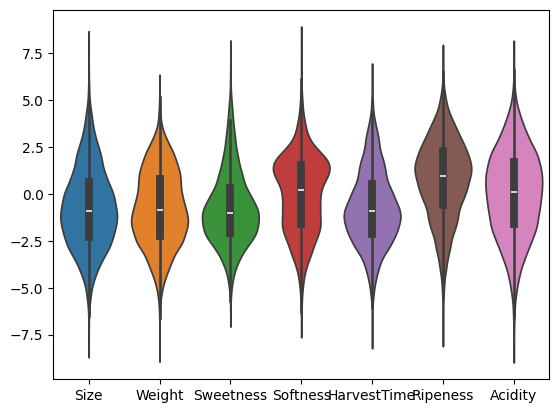

In [5]:
sns.violinplot(df)

<Axes: >

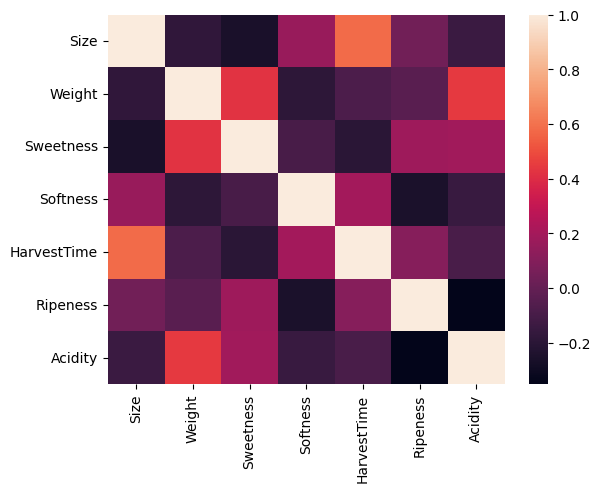

In [6]:
sns.heatmap(df.corr())

In [23]:
model_base = KMeans(n_clusters=2, random_state=9)
model_base.fit(df)

predictions_base = model_base.predict(df)

accuracy_score(predictions_base, y_true)

0.52375

<Axes: >

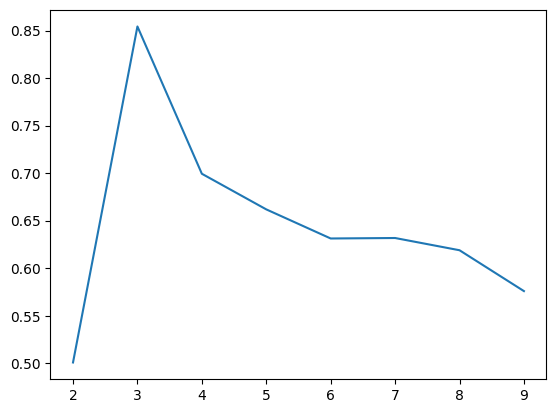

In [63]:
accuracies = []
clusters = [2,3,4,5,6,7,8,9]
for i in range(2, 10):
    model_clusters = KMeans(n_clusters=i, random_state=9)
    model_clusters.fit(df)

    predictions_clusters = model_clusters.predict(df)
    predictions_clusters = np.where(predictions_clusters == 2, 0, 1)

    accuracies.append(accuracy_score(predictions_clusters, y_true))

sns.lineplot(x=clusters, y=accuracies)

In [55]:
model_u = KMeans(n_clusters=3, random_state=9)
model_u.fit(df)

predictions_u = model_u.predict(df)
predictions_u = np.where(predictions_u == 2, 0, 1)

accuracy_score(predictions_u, y_true)


0.854375

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df, y_true, test_size=0.2)

model_s = RandomForestClassifier(random_state=9)
model_s.fit(x_train, y_train)

predictions_s = model_s.predict(x_test)

accuracy_score(predictions_s, y_test)

0.968125

<Axes: title={'center': 'Feature Importance'}, ylabel='Impurity Decrease'>

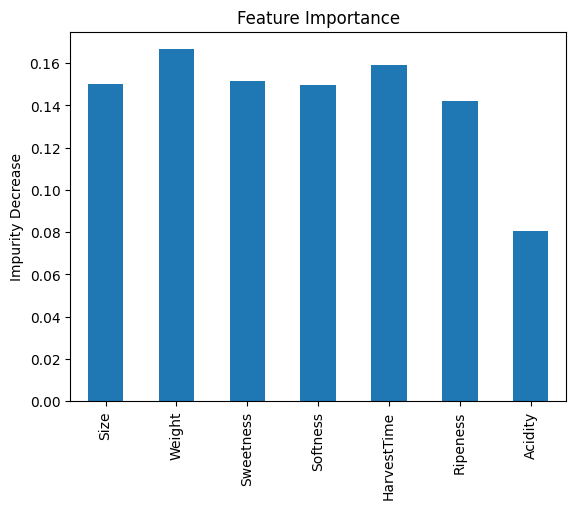

In [67]:
imp = model_s.feature_importances_
feat = df.columns.unique().tolist()
model_imp = pd.Series(imp, index=feat)

model_imp.plot.bar(title='Feature Importance', ylabel='Impurity Decrease')

In [71]:
model_comp = completeness_score(y_true, model_u.predict(df))
model_hom = homogeneity_score(y_true, model_u.predict(df))

print('Model Accuracy:', accuracy_score(predictions_u, y_true))
print('Model Completeness:', model_comp)
print('Model Homogeneity:', model_hom)

Model Accuracy: 0.854375
Model Completeness: 0.31504236668971947
Model Homogeneity: 0.49597806098164027
